In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_edm_dataset.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_pop_dataset.csv')
df3 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_rock_dataset.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_rap_dataset.csv')
df5 = pd.read_csv('/content/drive/MyDrive/MLEXAM1/final_country_dataset.csv')

In [3]:
df1['genre'] = 'edm'
#df2['genre'] = 'pop'
df3['genre'] = 'rock'
df4['genre'] = 'rap'
df5['genre'] = 'country'
#df = pd.concat([df1,df2,df3,df4,df5])
df = pd.concat([df1,df3,df4,df5])

In [4]:
df

,id,name,artists,artistid,explicit,popularity,durationms,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,2SHnUyZq0zwmvRIl4WY77G,Alive,['Krewella'],0Cd6nHYwecCNM1sVEXKlYr,False,52,290760,0.663,0.00413,0.822,0.003180,0.2340,-2.909,0.0557,128.002,0.567,edm
1,6h5PAsRni4IRlxWr6uDPTP,More Than You Know,['Axwell /\\ Ingrosso'],2XnBwblw31dfGnspMIwgWz,False,77,203000,0.646,0.02750,0.741,0.000000,0.3120,-4.973,0.0340,123.077,0.571,edm
2,0ct6r3EGTcMLPtrXHDvVjc,The Nights,['Avicii'],1vCWHaC5f2uS3yhpwWbIA6,False,83,176658,0.527,0.01660,0.835,0.000000,0.2490,-5.298,0.0433,125.983,0.654,edm
3,4ywUcVneBL8TNHIq6oJBz2,Calling (Lose My Mind) - Radio Edit,"['Sebastian Ingrosso', 'Alesso', 'Ryan Tedder']",6hyMWrxGBsOx6sWcVj1DqP,False,0,205440,0.416,0.00849,0.850,0.000175,0.2040,-4.910,0.0455,125.096,0.142,edm
4,46lFttIf5hnUZMGvjK0Wxo,Runaway (U & I),['Galantis'],4sTQVOfp9vEMCemLw50sbu,False,73,227073,0.506,0.00711,0.805,0.001930,0.0856,-4.119,0.0469,126.008,0.383,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7s2NbKcFIJuEQumhvtHTAD,You've Got to Stand for Something,['Aaron Tippin'],4XwKU420OWVk38vz1KvH3M,False,57,182280,0.533,0.19900,0.585,0.000000,0.1100,-9.789,0.0337,83.403,0.472,country
96,6o7BCdJjGvHBBPMb4ZrA68,Country Club,['Travis Tritt'],2M4Yt7oKGoYd0wqU44k4i2,False,54,190800,0.805,0.19400,0.570,0.000015,0.1060,-8.215,0.0272,126.478,0.760,country
97,26bL4gSULWDgdIMX0pRFrG,Redneck Woman,['Gretchen Wilson'],0IdYRFTswLdsGwSnzOaGNF,False,62,221333,0.499,0.13000,0.825,0.000000,0.3060,-5.146,0.1770,185.069,0.753,country
98,23hDnIFoFlVTDA6y8YrJoR,Colder Weather,['Zac Brown Band'],6yJCxee7QumYr820xdIsjo,False,1,273893,0.667,0.45500,0.381,0.000000,0.1160,-7.494,0.0294,135.975,0.199,country


In [5]:
df['explicit'] = df['explicit'].map({True:1,False:0})

In [11]:
df2 = df[['popularity','durationms','danceability', 'acousticness','energy', 'liveness', 'loudness', 'speechiness','tempo', 'valence','explicit','genre']]

<ipython-input-12-65c156123158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genre'] = le.transform(df2['genre'])


<Axes: >

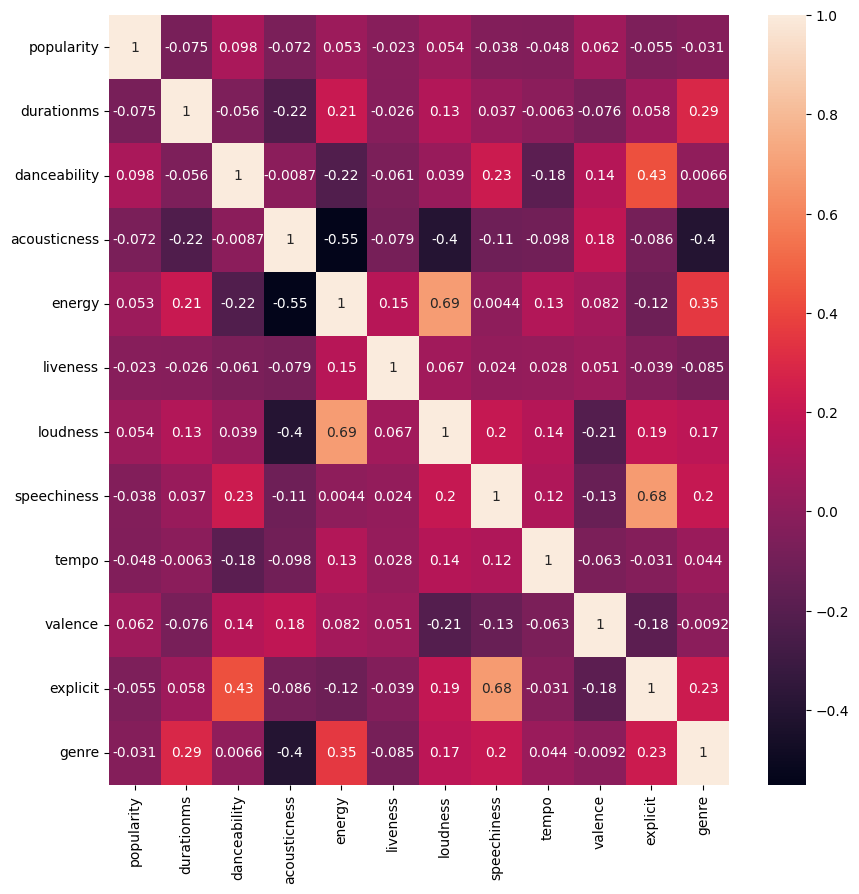

In [12]:
df2['genre'] = le.transform(df2['genre'])
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True)

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2,random_state=21)

In [9]:
y_train = train['genre']
y_test = test['genre']
X_train = train.drop('genre',axis=1)
X_test = test.drop('genre',axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
one_hot_encoder = OneHotEncoder(sparse=False)
y_train_one_hot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
y_train_one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
pd.DataFrame(X_train,columns=['popularity','durationms','danceability', 'acousticness','energy', 'liveness', 'loudness', 'speechiness','tempo', 'valence','explicit']).to_csv('trainX_NN.csv')

In [83]:
pd.DataFrame(X_test,columns=['popularity','durationms','danceability', 'acousticness','energy', 'liveness', 'loudness', 'speechiness','tempo', 'valence','explicit']).to_csv('testX_NN.csv')

In [91]:
pd.DataFrame(y_train_one_hot,columns=['country','edm','rap','rock']).to_csv('trainy_NN.csv')

In [62]:
# Defining neural network architecture 

import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.extmath import sparse
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras import backend as K
tf.config.run_functions_eagerly(True)

In [63]:
model = Sequential()
model.add(Dense(units=11, activation='relu', input_shape=[11,]))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [64]:
history = model.fit(X_train,y_train_one_hot,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 1s 51ms/step - loss: 1.4888 - accuracy: 0.2382
Epoch 2/100
10/10 [==============================] - 0s 47ms/step - loss: 1.4521 - accuracy: 0.2602
Epoch 3/100
10/10 [==============================] - 0s 39ms/step - loss: 1.4235 - accuracy: 0.2915
Epoch 4/100
10/10 [==============================] - 0s 38ms/step - loss: 1.4009 - accuracy: 0.2915
Epoch 5/100
10/10 [==============================] - 0s 42ms/step - loss: 1.3809 - accuracy: 0.3229
Epoch 6/100
10/10 [==============================] - 0s 40ms/step - loss: 1.3616 - accuracy: 0.3323
Epoch 7/100
10/10 [==============================] - 0s 33ms/step - loss: 1.3456 - accuracy: 0.3323
Epoch 8/100
10/10 [==============================] - 0s 31ms/step - loss: 1.3298 - accuracy: 0.3417
Epoch 9/100
10/10 [==============================] - 0s 35ms/step - loss: 1.3148 - accuracy: 0.3542
Epoch 10/100
10/10 [==============================] - 0s 32ms/step - loss: 1.2979 - accuracy: 0.3605
Epoch 11/10

In [65]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 dense_16 (Dense)            (None, 6)                 72        
                                                                 
 dense_17 (Dense)            (None, 4)                 28        
                                                                 
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________
None


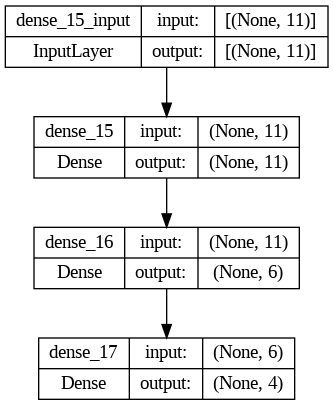

In [66]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [67]:
y_pred = np.argmax(model.predict(X_test),axis=1)

3/3 [==============================] - 0s 8ms/step


In [68]:
y_pred

array([1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 3, 1, 2, 0, 3, 0, 0, 0, 2, 1, 0, 2,
       3, 1, 0, 1, 2, 0, 1, 0, 3, 1, 1, 1, 1, 3, 1, 1, 0, 3, 2, 1, 1, 1,
       3, 1, 1, 2, 0, 0, 2, 2, 3, 3, 0, 1, 0, 0, 1, 3, 2, 1, 0, 1, 2, 2,
       2, 0, 3, 0, 0, 1, 2, 3, 2, 1, 0, 0, 3, 0])

In [69]:
le.transform(y_test)

array([3, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 3, 0, 1, 2, 3, 3, 3,
       3, 1, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 0, 3, 2, 1, 1, 1,
       3, 1, 1, 2, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 1, 2, 2,
       2, 3, 3, 0, 3, 1, 2, 3, 2, 1, 0, 0, 3, 0])

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


In [71]:
accuracy_score(le.transform(y_test), y_pred)

0.7875


The confusion matrix is:


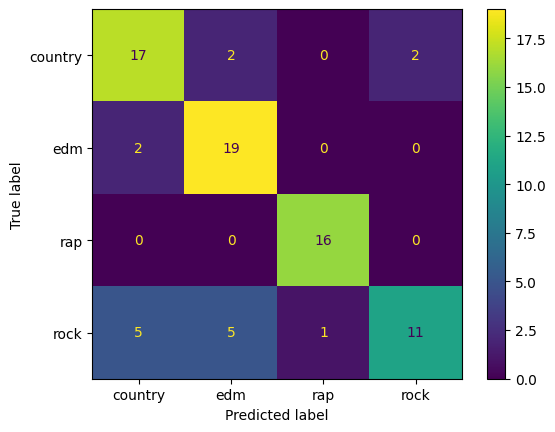

              precision    recall  f1-score   support

     country       0.71      0.81      0.76        21
         edm       0.73      0.90      0.81        21
         rap       0.94      1.00      0.97        16
        rock       0.85      0.50      0.63        22

    accuracy                           0.79        80
   macro avg       0.81      0.80      0.79        80
weighted avg       0.80      0.79      0.78        80



In [72]:
cnf_matrix = confusion_matrix(le.transform(y_test), y_pred)
print("\nThe confusion matrix is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=le.classes_)  
disp.plot()
plt.show()
print(classification_report(le.transform(y_test), y_pred,target_names=le.classes_))

In [73]:
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from ann_visualizer.visualize import ann_viz;

In [75]:
ann_viz(model, view=True, title="Spotify genre classifier NN")

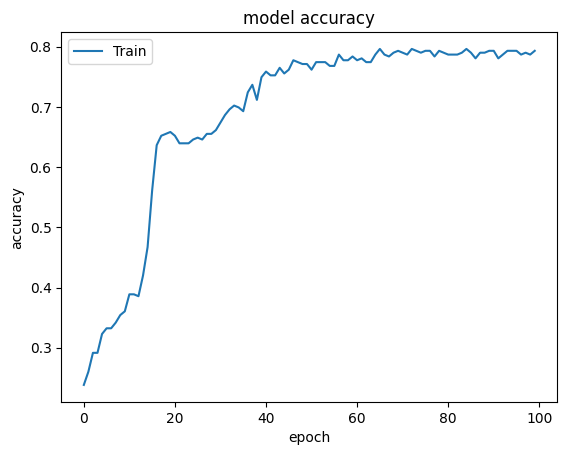

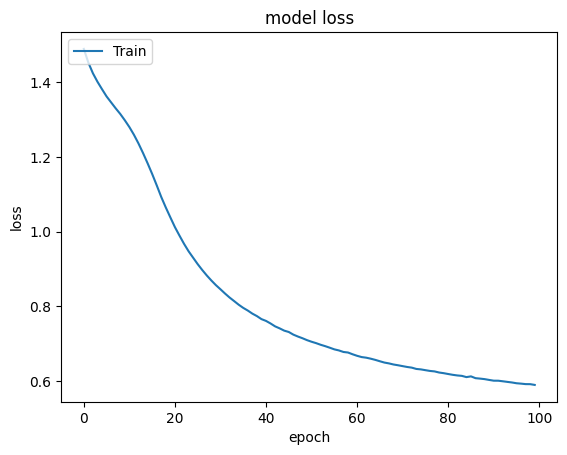

In [96]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()